# NLP Midterm Project - Fake News Detection

## Introduction

### Problem Area
The main objective of this project is to develop a fake news detection model using natural language processing. In this current time, the spreading of misinformation and fake news poses significant challenges to society. The spread of false information can have major and serious consequences, including influencing public opinion, causing distrust, and even causing chaos in our society. It is very crucial to address this issue by developing effective methods to identify and combat fake news.

Fake news articles are intentionally created to trick readers by presenting false information as factual news. Detecting these articles from genuine news is a complex task that requires advanced language and statistical analysis aswell as machine learning algorithms. By focusing on fake news detection, this project aims to contribute to the development of effective tools and techniques for identifying false information.

This project seeks to explore the patterns, difference, and features that differentiate fake news from the real news. By using natural language processing techniques the project aims to build a reliable and accurate fake news detection system.

The impact of fake news on public discourse and decision making processes really displays the urgency of this problem. By facing the challenge of fake news detection, this project seeks to help individuals, journalists, and organisations to make informed decisions and combat the spread of misinformation.

## Objectives
The main objectives of this project are to:

- Develop a dataset: Gather a diverse dataset of news articles, including both true and fake news samples. This dataset will be the material for training and testing the fake news detection model.

- Preprocessing and Feature Extraction: Perform preprocessing steps, such as data cleansing, tokenisation, and removing stop words from the headlines to prepare the text data for analysis. Extract word frequencies to capture the patterns and cues that can identify the fake news.

- Model Training and Evaluation: Use machine learning  techniques to train a fake news detection model on the labeled dataset. Evaluate the performance of the model using appropriate evaluation techniques, such as accuracy, precision, recall, and F1-score, to assess its effectiveness in correctly identifying fake news.

- Identify important features: Analyse the trained model to identify the most important features or indicators of fake news. This analysis will provide insights into the characteristics associated with false information in news headlines.

- Deploy and Test the Model: Deploy the trained model as a fake news detection system and evaluate its performance on unseen news articles or a separate dataset. Monitor the model's accuracy and adjust it accordingly to improve its performance over time.

By completing these objectives, this project aims to contribute to the development of a reliable fake news detection system that can help users in telling the difference between true and fake news articles. The system will hopefully help reduce the spread of misinformation, keep public trust, and allow informed decision making in an time of an excess amount of information from various sources.

## Dataset
For the fake news detection project, the selected dataset is the ISOT Fake News dataset, available on Kaggle. The dataset consists of two CSV files: one containing fake news articles and the other containing real news articles. The dataset can be accessed at the following Kaggle page: (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset).This kaggle dataset sourced its data from University of Victoria's (ISOT Fake News dataset: https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/)

The ISOT Fake News dataset comprises several thousand articles collected from different legitimate news sites as well as sites flagged as unreliable by Politifact.com. The dataset provides a valuable resource for training and evaluating fake news detection models by offering a diverse range of fake and real news articles.

Each CSV file in the dataset contains four columns:

- Title: The title of the article.
- Text: The main text content of the article.
- Subject: The subject or category of the article.
- Date: The date of publication of the article.

The dataset is relatively large, with each CSV file containing approximately 20,000 rows. However, I may choose to reduce the number of rows for computational efficiency if required.

To prepare the dataset for analysis, it is important to perform data cleaning and preprocessing. This process may involve handling missing values, addressing duplicate entries, standardizing data formats, and applying relevant data cleansing techniques to ensure the accuracy and consistency of the data.

By utilizing the ISOT Fake News dataset, I can gain insights into the characteristics and patterns of fake and real news articles. The dataset offers an opportunity to train and evaluate fake news detection models and develop effective strategies for combating misinformation in the media.

## Evaluation Methodology
To ensure the accuracy and reliability of the findings, this study will use a evaluation methodology. The following experimental design and evaluation metrics will be utilised to assess the performance of the fake news detection system:

- Precision: Precision measures the proportion of correctly classified fake news articles out of all articles classified as fake. It quantifies the accuracy of the system in correctly identifying fake news, minimising false positives.

- Recall: Recall calculates the proportion of correctly classified fake news articles out of all actual fake news articles. It captures the ability of the system to identify all relevant instances of fake news, minimising false negatives.

- Accuracy: Accuracy measures the overall correctness of the system's predictions by calculating the ratio of correctly classified articles (both fake and real) to the total number of articles. It provides a comprehensive measure of the system's performance in correctly identifying fake news.

- F1-score: F1-score combines both recall and precision to provide a balanced assessment of the system's performance. F1-score is particularly useful when precision and recall are of equal importance, providing an overall effectiveness measure for the fake news detection system.

To establish benchmarks and evaluate the contribution of this project, comparisons will be made with the baseline expectancy.

By employing these evaluation metrics and benchmarks, this project aims to provide a rigorous and comprehensive analysis of fake news detection. The evaluation methodology will ensure the accuracy and reliability of the system's performance, contributing to the ongoing efforts in combating the spread of misinformation.

## Implementation


In [1]:
#importing libraries that we will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#import the true and fake news dataset into pandas dataframes
true_news = pd.read_csv('data/True.csv')
fake_news = pd.read_csv('data/Fake.csv')

### Data Cleaning and Preparation

In [3]:
#adding a column called valid stating all true news are true
true_news['valid'] = 'True'

print(true_news.shape)
true_news.head()

(21417, 5)


,title,text,subject,date,valid
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [4]:
#adding a column called valid stating all fake news are fake
fake_news['valid'] = 'Fake'

print(fake_news.shape)
fake_news.head()

(23481, 5)


,title,text,subject,date,valid
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


Combine the two datasets into one dataframe and add a column to indicate whether the news is fake or real. Also remove the date, subject and text columns as they are not needed for the analysis.

In [5]:
#combine the two dataframes into one
df = pd.concat([true_news, fake_news])

#drop the date,subject and text columns
df.drop(["date", "subject", "text"], axis=1, inplace=True)

#remove nan values
df = df.dropna()

#shuffle the dataset

df = df.sample(frac=1).reset_index(drop=True)

print(df.shape)
df.head()

(44898, 2)


,title,valid
0,"No, Conservatives, The ‘Golden Showers’ Trump...",Fake
1,Trump says he has not obstructed FBI's probe R...,True
2,BRAVE PRO-TRUMP REPORTER Grabs Microphone At C...,Fake
3,Jimmy Fallon’s Trump Claims VICTORY As ‘The W...,Fake
4,Gunmen assassinate mayor of Libya's biggest po...,True


Let's take a look and see the ratio of fake news to real news in the dataset. Too many of either fake/true news articles may skew the model to predict one more often than the other.

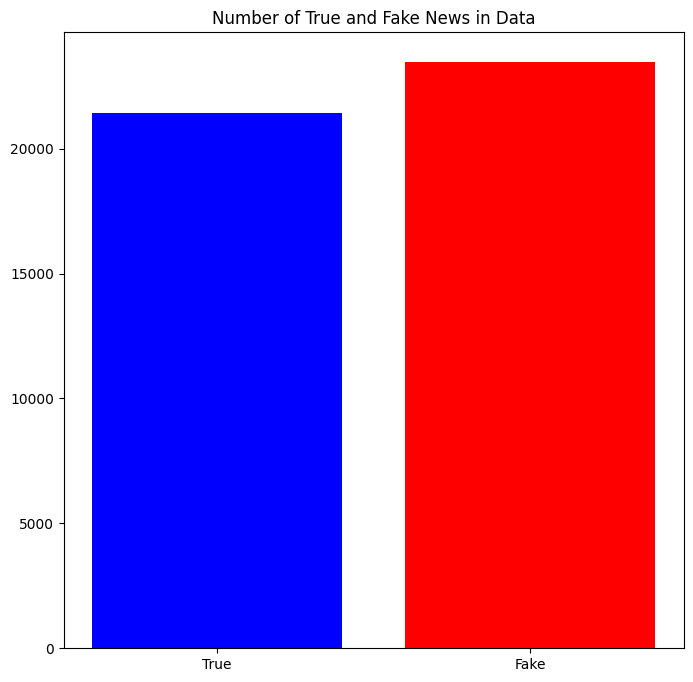

In [6]:
#plot number of true and fake news using matplotlib

plt.figure(figsize=(8, 8))
sum_true = df['valid'].value_counts()['True']

sum_fake = df['valid'].value_counts()['Fake']

plt.bar(['True', 'Fake'], [sum_true, sum_fake], color=['blue', 'red'])
plt.title('Number of True and Fake News in Data')
plt.show()



## Baseline

The baseline for this project will be the majority class. The majority class is the class that occurs the most in the dataset. In this case, the majority class is fake news. The baseline accuracy is the percentage of the majority class in the dataset. The baseline accuracy for this project is above 50%. This means that the model should be able to at the bare minimum predict fake news at least 50% of the time. I'm hoping for a prediction accuracy of over 70% to be considered a good model.

### Data Preprocessing
We can see that the dataset is fairly balanced. This is a good ratio to train the model on. Now we can start preprocessing the data, by first removing punctuation from the headlines then turning all text to lowercase, tokenising the headlines and removing stop words using nltk's imported stopwords.

In [7]:
#make title column a list of tokens without stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt') #download punkt package for word_tokenize

for i in range(0, len(df)):
    text = df['title'][i]
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = text.lower() #convert to lowercase
    text = word_tokenize(text) #tokenise
    text = [word for word in text if word not in stopwords.words('english')] #remove stopwords by comparing with stopwords.words('english')
    df['title'][i] = text #assign the list of tokens to the title column

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brentblake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,valid
0,"[conservatives, golden, showers, trump, story,...",Fake
1,"[trump, says, obstructed, fbis, probe, russia,...",True
2,"[brave, protrump, reporter, grabs, microphone,...",Fake
3,"[jimmy, fallons, trump, claims, victory, winne...",Fake
4,"[gunmen, assassinate, mayor, libyas, biggest, ...",True


### Feature Extraction
Now that we have clean and organised data, we can start to extract features from the headlines. First we will gather features and lablet, split our data into training and testing parts using sklearns train_test_split method.

In [8]:
#extract features and labels
X = df['title']
y = df['valid']

#split the dataset into training and testing sets
#done with sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)



Then we can use the nltk frequency distribution to extract the word frequencies from the headlines. This will give us a list of the most common words in the headlines. We can then use this list to extract the features from the headlines. We will use the top 1000 most common words as features.

In [9]:
N = 1000
#create a frequency list of the N most common words in the dataset

#used nltk.FreqDist() function to create a frequency distribution of all words in the dataset
all_words = nltk.FreqDist([word for text in X_train for word in text])

#extract only the N most common words
word_features = list(all_words.keys())[:N]

#function to create a feature vector for each title
#following function used in lecture video at the 4 min mark (https://www.coursera.org/learn/uol-cm3060-natural-language-processing/lecture/0vwwD/sentiment-analysis-using-supervised-learning)
def find_features(title):
    words = set(title)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features


In [10]:
#sanity check
len(word_features)

1000

Lets take a look at the most common words in the all headlines.

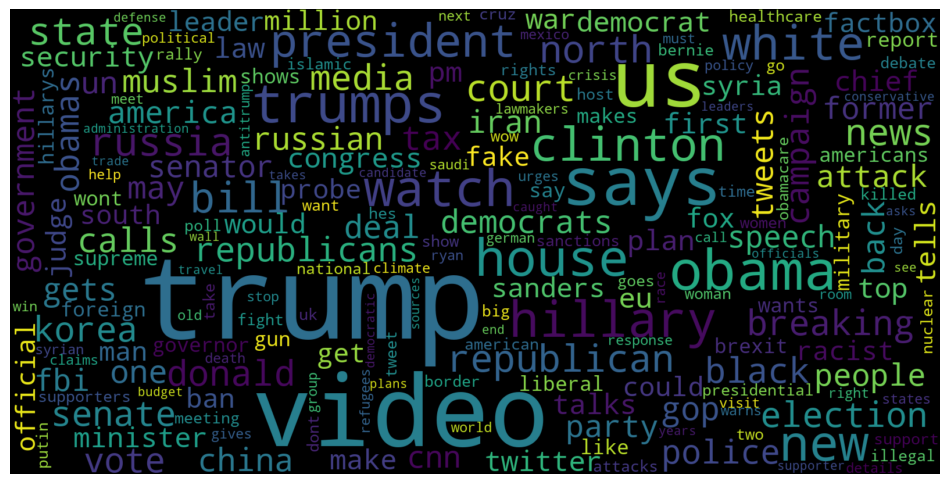

In [11]:
#wordcloud of the most common words in the dataset
from wordcloud import WordCloud

#used wordcloud library and followed the example in the documentation (http://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate_from_frequencies(all_words)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Classification
With all our features extracted, we can now train our model. We will use the 
Naive Bayes classifier to train our model and we will use the training data to train the model and then use the testing data to test the model. Once the model is trained, we can then use the nltk classify.accuracy method to test the accuracy of the model. After testing with other models such as Decision Tree and Max Entropy it soon became very clear with the volume of data and the limited processing power of my computer, that the Naive Bayes classifier was the best model to use for this project.

In [12]:
#used the find_features function to convert the training and testing data to feature vectors
X_train = [(find_features(title), label) for (title, label) in zip(X_train, y_train)]
X_test = [(find_features(title), label) for (title, label) in zip(X_test, y_test)]

#train a Naive Bayes classifier using nltk
from nltk.classify import NaiveBayesClassifier

#used the NaiveBayesClassifier.train() function to train the classifier
classifier = NaiveBayesClassifier.train(X_train)

#used the classifier.classify() function to predict the labels of the test data
y_pred = [classifier.classify(title) for (title, label) in X_test]
#test the classifier accuracy with nltk.classify.accuracy() function
print("Accuracy:", nltk.classify.accuracy(classifier, X_test))



Accuracy: 0.878218262806236


The model testing seems to have a great accuracy of about 88%. Now using nltk's built in feature we can see which features are most informative in determining whether a headline is fake or real.

In [13]:
#display the most informative features with the show_most_informative_features() function
classifier.show_most_informative_features(20)

Most Informative Features
                   video = True             Fake : True   =    258.9 : 1.0
                breaking = True             Fake : True   =     93.4 : 1.0
                  racist = True             Fake : True   =     84.7 : 1.0
                     lie = True             Fake : True   =     83.8 : 1.0
                  chinas = True             True : Fake   =     80.6 : 1.0
                     gop = True             Fake : True   =     76.5 : 1.0
                  macron = True             True : Fake   =     66.8 : 1.0
                   lives = True             Fake : True   =     64.1 : 1.0
                    rips = True             Fake : True   =     59.4 : 1.0
                     doj = True             Fake : True   =     57.6 : 1.0
                    seek = True             True : Fake   =     56.2 : 1.0
                   watch = True             Fake : True   =     51.7 : 1.0
                   alien = True             Fake : True   =     50.9 : 1.0

### Results and Discussion
Looking at the most informative features we can see some very interesting words that seem to have a big influence on determining whether a headline is true or fake. For instance the word 'video' is the biggest indicator, maybe due to the fact that a fake news article is try to draw in clicks to their website for ad revenue as videos come across more interesting than just text? Also the word 'supporter' is a big indicator, possibly to cause a reaction from readers, for instance if the headline is 'Trump supporter does x and y' this would cause a reaction from maybe opposing supporters and cause them to click on the article. There also seems to be just a lot of big buzz words that are used in fake news articles to draw in readers such as racist, cops, radical etc.

Next we can also make a word cloud of the most informative features to have a good visual of words to look out for in news articles.

[('video', True), ('breaking', True), ('racist', True), ('lie', True), ('chinas', True), ('gop', True), ('macron', True), ('lives', True), ('rips', True), ('doj', True), ('seek', True), ('watch', True), ('alien', True), ('perfect', True), ('lied', True), ('bangladesh', True), ('hollywood', True), ('dad', True), ('images', True), ('cop', True), ('hillary', True), ('capital', True), ('liar', True), ('talks', True), ('ridiculous', True), ('pm', True), ('boom', True), ('parliament', True), ('disturbing', True), ('van', True), ('radical', True), ('limit', True), ('flag', True), ('gowdy', True), ('wire', True), ('turkey', True), ('mocks', True), ('ministry', True), ('confederate', True), ('black', True), ('responds', True), ('uses', True), ('regional', True), ('va', True), ('withdrawal', True), ('seeks', True), ('exposing', True), ('dismisses', True), ('reach', True), ('store', True), ('trumpcare', True), ('baltimore', True), ('eu', True), ('hezbollah', True), ('sanctions', True), ('racism',

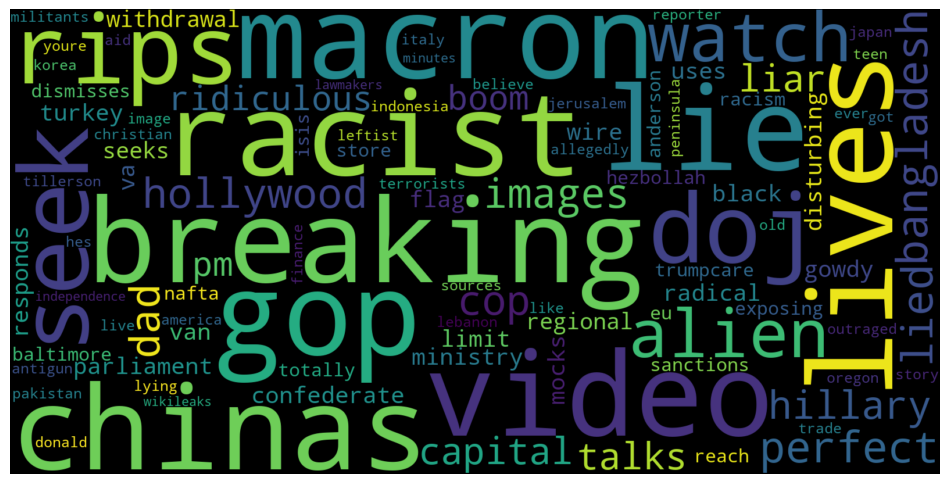

In [14]:
#wordcloud of the most informative features
most_informative_features = classifier.most_informative_features(100)
print(most_informative_features)

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate_from_frequencies(dict(most_informative_features))

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Evaluation
Next we need to evaluate our results in a more thorough way. Firstly we can construct a confusion matric that can be used to calculate accuracy, precision, recall and f1 score.

True Positives: 5050
True Negatives: 4808
False Positives: 531
False Negatives: 836


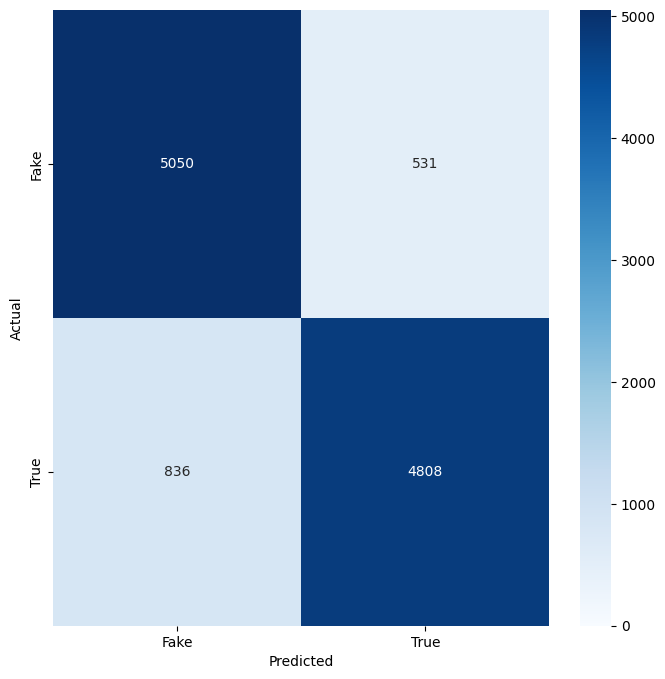

In [15]:
import seaborn as sns
#EVALUATION

#create confusion matrix
def confusion_matrix(y_true, y_pred):
    tp = 0 #true positive
    tn = 0 #true negative
    fp = 0 #false positive
    fn = 0 #false negative

    #loop through the true and predicted labels to compare
    for i in range(0, len(y_true)):
        if y_true[i] == 'Fake' and y_pred[i] == 'Fake':
            tp += 1 #if both are fake then true positive
        elif y_true[i] == 'True' and y_pred[i] == 'True':
            tn += 1 #if both are true then true negative
        elif y_true[i] == 'True' and y_pred[i] == 'Fake':
            fp += 1 #if true but predicted fake then false positive
        elif y_true[i] == 'Fake' and y_pred[i] == 'True':
            fn += 1 #if fake but predicted true then false negative

    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix(y_test.tolist(), y_pred)

print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

#plot confusion matrix 0 is white and higher values are darker
plt.figure(figsize=(8, 8))
#used seaborn heatmap function to plot the confusion matrix
sns.heatmap([[tp, fp], [fn, tn]], annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'], vmin=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Finally with our confusion martix constructed, we can calculate the accuracy, precision, recall and f1 score of our model.

In [16]:
#calculate precision, recall, f1-score and accuracy

precision = tp / (tp + fp)

recall = tp / (tp + fn)

f1_score = 2 * ((precision * recall) / (precision + recall))

accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.904855760616377
Recall: 0.8579680598029222
F1-Score: 0.8807883491758961
Accuracy: 0.878218262806236


## Conclusion

In conclusion, this project focused on developing a fake news detection system using natural language processing techniques. The main objectives were to gather a diverse dataset of fake and real news articles, preprocess the data, extract relevant features, train a Naive Bayes classifier, and evaluate the performance of the model.

The dataset used for this project was the ISOT Fake News dataset, comprising thousands of articles collected from legitimate news sites as well as produced fake news. The dataset provided a valuable resource for training and evaluating the fake news detection model.

The preprocessing step involved removing punctuation, converting text to lowercase, tokenising the headlines, and removing stopwords using the NLTK library. This ensured that the text data was clean and ready for feature extraction.

The feature extraction process involved extracting word frequencies from the headlines. The top 1000 most common words were selected as features, which helped capture the patterns and cues that distinguish fake news from real news.

The Naive Bayes classifier was trained on the extracted features using the training dataset. The accuracy of the model was tested on the testing dataset, and the classifier achieved an accuracy of approximately 88%. The most informative features of the model were identified, providing insights into the characteristics associated with fake news articles.

The evaluation of the model was conducted using a confusion matrix, which allowed for the calculation of precision, recall, F1-score, and accuracy. The precision was approximately 90%, indicating the model's ability to correctly classify fake news articles. The recall was approximately 86%, demonstrating the model's effectiveness in identifying actual fake news articles. The F1-score, a balanced measure of precision and recall, was approximately 88%. The overall accuracy of the model was approximately 88.5%. This to my delight far clears the baseline accuracy of above 50%.

It is important to note that this project has some limitations. The model's performance may vary on different datasets, and the model should in future be subjected to unseen news articles for further testing. Also, the features and techniques used in this project can be further dived into and expanded on, for instance looking at more than just word frequency as a feature.

In future work, additional techniques such as deep learning models and fact checking methods can be explored to improve the performance and reliability of the fake news detection system, since it is possible for a headline to sound completely true but possibly have skewed values.

Overall, this project has made a good attemot to contribute to the field of natural language processing and fake news detection by providing insights, methodologies, and a trained model for identifying false information. I believe it is a valuable step towards promoting truthful information and allowing informed decision making in the face of the sea of fake news.

### References

- Where I found my dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

- Where the data is sourced from: https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/

- The find feature function that I learned about in this lecture: https://www.coursera.org/learn/uol-cm3060-natural-language-processing/lecture/0vwwD/sentiment-analysis-using-supervised-learning

- Where I learned to create a wordcloud: http://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py
 


